# Imports

In [1]:
from plot_utils import *
import seaborn as sns

%matplotlib inline

## Load Survey Data (Pilot)

In [2]:
df_pilot = pd.read_csv('data/pilot_data_cleaned.csv')
df_pilot.Start = pd.to_datetime(df_pilot.Start.values)
df_pilot.End = pd.to_datetime(df_pilot.End.values)
df_pilot['duration_in_minutes'] = round((df_pilot.End-df_pilot.Start).astype('timedelta64[s]')/60.,2)
df_pilot.head()

Unnamed: 0  ID Type               Start                 End  \
0           1   1    C 2021-03-11 00:18:46 2021-03-11 00:28:15   
1           2   1    C 2021-03-11 00:18:46 2021-03-11 00:28:15   
2           3   1    C 2021-03-11 00:18:46 2021-03-11 00:28:15   
3           5   1    C 2021-03-11 00:18:46 2021-03-11 00:28:15   
4           6   1    C 2021-03-11 00:18:46 2021-03-11 00:28:15   

                 Age  Gender English             Degree   Read  ... Effective  \
0  18 - 25 years old  Female     Yes  Bachelor's Degree  Daily  ...         6   
1  18 - 25 years old  Female     Yes  Bachelor's Degree  Daily  ...         5   
2  18 - 25 years old  Female     Yes  Bachelor's Degree  Daily  ...         6   
3  18 - 25 years old  Female     Yes  Bachelor's Degree  Daily  ...         5   
4  18 - 25 years old  Female     Yes  Bachelor's Degree  Daily  ...         5   

   Intelligence  Interest       Length Like                    Mistakes  q  \
0             4         4  Appropriate    2  None or did not notice any  1   
1             3         2  Appropriate    2                      1 or 2  1   
2             4         4  Appropriate    1                      1 or 2  0   
3             5         4  Appropriate    2  None or did not notice any  1   
4             4         4  Appropriate    3  None or did not notice any  1   

   Writing  q_num  duration_in_minutes  
0        4      1                 9.48  
1        3      2                 9.48  
2        4      3                 9.48  
3        4      5                 9.48  
4        4      6                 9.48  

[5 rows x 21 columns]

## Pilot Participation

In [3]:
df2 = df_pilot.groupby(by=['ID','Type']).size().reset_index()[['ID','Type']]\
    .groupby(by='Type').size().reset_index().rename(columns={0:'total', 'Type':'treatment'})
df2.replace({"treatment":{'C':'Control', 'T':'Typographical', 'P':'Phonological'}}, inplace=True)

p = participant_count_plot(df2)
p.save('participant_count_pilot.html')

In [4]:
#p

## Load Survey Day (Experiment)

In [5]:
df = pd.read_csv('data/results_cleaned_04092021.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Start Date'] = pd.to_datetime(df['Start Date'].values)
df.head()

ROWID    Prompt  PromptTime  QuestionTime  Knowledge       Length  \
0      1  Accident      16.483        23.717          1  Appropriate   
1      1      Diet      27.320        38.699          1     Too long   
2      1      Mind      20.233        24.074          0  Appropriate   
3      1     Music      25.906        22.202          1     Too long   
4      1    Sports      14.485        29.150          1  Appropriate   

   Interest  Effective  Intelligence  Writing  ...  English  \
0         2          2             2        2  ...      Yes   
1         2          3             2        3  ...      Yes   
2         2          3             4        2  ...      Yes   
3         2          1             2        2  ...      Yes   
4         4          5             4        4  ...      Yes   

                 Race                   Country     State  Student  \
0  Non-Hispanic White  United States of America  New York    Other   
1  Non-Hispanic White  United States of America  New York    Other   
2  Non-Hispanic White  United States of America  New York    Other   
3  Non-Hispanic White  United States of America  New York    Other   
4  Non-Hispanic White  United States of America  New York    Other   

              Degree ReadSocialMedia  WriteSocialMedia          Start Date  \
0  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
1  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
2  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
3  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
4  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   

          wpm  
0  189.285931  
1  210.834553  
2  118.618099  
3  173.704933  
4  157.404211  

[5 rows x 27 columns]

# Demographics Analysis

In [6]:
rend = get_missing_demographics(df)

with open("missing_demographic_data.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()

In [7]:
#rend

In [27]:
df['likert_var'] = np.var(df[['Interest','Effective','Intelligence','Writing','Meet']], axis=1)

In [37]:
df_amazon = df[(df['Start Date'] < '2021-04-05')].copy()
df_amazon['likert_var'] = np.var(df_amazon[['Interest','Effective','Intelligence','Writing','Meet']], axis=1)
df_amazon[(df_amazon.likert_var == 0.0)]\
    [['ROWID','Prompt','PromptTime','QuestionTime','wpm','Interest','Effective','Intelligence','Writing','Meet']]\
    .sort_values(by=['ROWID','Prompt'])\
    .rename(columns={'ROWID':'participant_id','PromptTime':'prompt_time',
        'QuestionTime':'question_time','Prompt':'question'})

participant_id  question  prompt_time  question_time          wpm  \
0                  1  Accident       16.483         23.717   189.285931   
35                 7  Accident        4.894         16.389   637.515325   
38                 7     Music       26.291         20.680   171.161234   
73                13      Mind       20.036         26.209   119.784388   
207               35   Science       17.982         17.248   160.160160   
215               37  Accident        8.902         74.285   350.483038   
216               37      Diet       14.564        115.369   395.495743   
217               37      Mind        9.812         51.508   244.598451   
218               37     Music        7.419         81.613   606.550748   
219               37   Science       12.055         64.790   238.905019   
220               37    Sports       10.480         49.800   217.557252   
281               48  Accident        2.177         13.523  1433.164906   
282               48      Diet        4.040         18.377  1425.742574   
283               48      Mind        1.597         11.394  1502.817783   
284               48     Music        2.723         12.488  1652.589056   
285               48   Science        2.104         10.775  1368.821293   
286               48    Sports        5.705         15.059   399.649430   
1168             196  Accident        4.054          8.426   769.610261   
1169             196      Diet        1.895         36.601  3039.577836   
1170             196      Mind       73.444          9.935    32.677959   
1171             196     Music        7.046          8.440   638.660233   
1172             196   Science        1.427          5.855  2018.220042   
1173             196    Sports        1.325          6.193  1720.754717   
1248             209      Mind       17.955         42.715   133.667502   

      Interest  Effective  Intelligence  Writing  Meet  
0            2          2             2        2     2  
35           7          7             7        7     7  
38           1          1             1        1     1  
73           6          6             6        6     6  
207          7          7             7        7     7  
215          4          4             4        4     4  
216          4          4             4        4     4  
217          4          4             4        4     4  
218          4          4             4        4     4  
219          4          4             4        4     4  
220          4          4             4        4     4  
281          4          4             4        4     4  
282          4          4             4        4     4  
283          4          4             4        4     4  
284          4          4             4        4     4  
285          4          4             4        4     4  
286          4          4             4        4     4  
1168         4          4             4        4     4  
1169         4          4             4        4     4  
1170         4          4             4        4     4  
1171         4          4             4        4     4  
1172         4          4             4        4     4  
1173         4          4             4        4     4  
1248         6          6             6        6     6

In [38]:
df_xlab = df[(df['Start Date'] > '2021-04-05')].copy()
df_xlab['likert_var'] = np.var(df_xlab[['Interest','Effective','Intelligence','Writing','Meet']], axis=1)
df_xlab[(df_xlab.likert_var == 0.0)]\
    [['ROWID','Prompt','PromptTime','QuestionTime','wpm','Interest','Effective','Intelligence','Writing','Meet']]\
    .sort_values(by=['ROWID','Prompt'])\
    .rename(columns={'ROWID':'participant_id','PromptTime':'prompt_time',
        'QuestionTime':'question_time','Prompt':'question'})

participant_id  question  prompt_time  question_time          wpm  \
293               50  Accident        2.110         14.799  1478.672986   
294               50      Diet        2.043         20.781  2819.383260   
295               50      Mind        2.629         14.274   912.894637   
296               50   Science        1.602         16.170  1797.752809   
297               50    Sports        7.104         15.852   320.945946   
...              ...       ...          ...            ...          ...   
1483             248   Science        9.982         13.743   288.519335   
1484             248    Sports        7.355         18.629   309.993202   
1537             257   Science       10.437         15.881   275.941362   
1568             262    Sports       22.734         28.015   100.290314   
1583             265      Mind        9.018         18.304   266.134398   

      Interest  Effective  Intelligence  Writing  Meet  
293          4          4             4        4     4  
294          4          4             4        4     4  
295          4          4             4        4     4  
296          4          4             4        4     4  
297          4          4             4        4     4  
...        ...        ...           ...      ...   ...  
1483         5          5             5        5     5  
1484         1          1             1        1     1  
1537         3          3             3        3     3  
1568         4          4             4        4     4  
1583         5          5             5        5     5  

[105 rows x 10 columns]

In [10]:
# generate plot for "good" year data
p = get_good_demographic_year(df)
p.save('demographic_year_goodonly.html')
#p

In [12]:
# generate gender plot
p = get_demographic_gender(df)
p.save('demographic_gender.html')
#p

In [13]:
# generate country plot
p = get_demographic_country(df)
p.save('demographic_country.html')
#p

In [9]:
p = get_demographic_state(df)
p.save('demographic_state.html')
#p

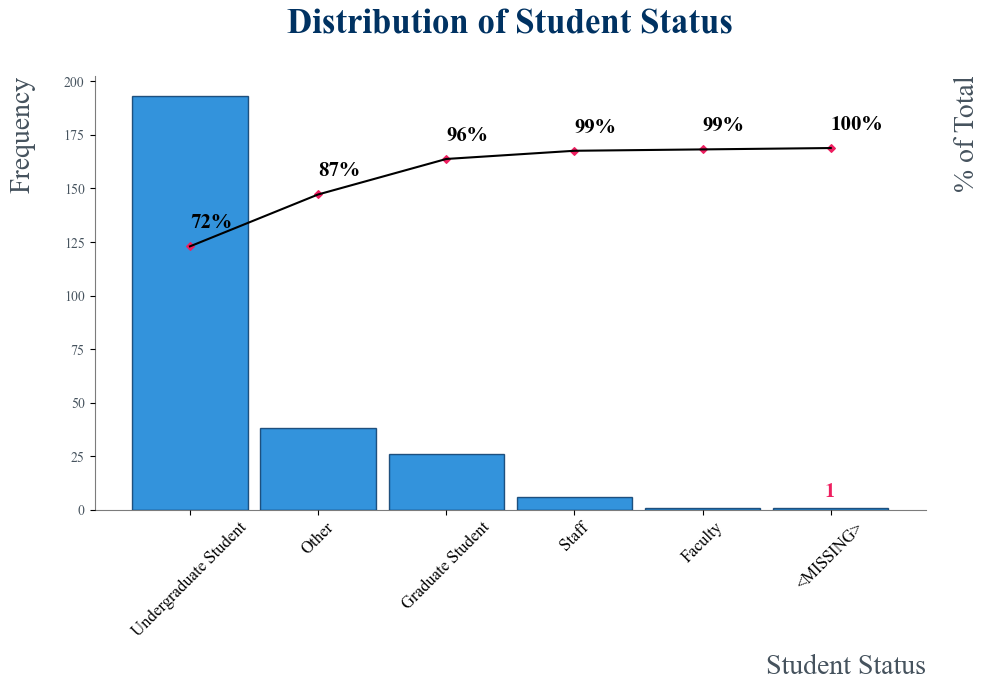

In [11]:
p = get_demographic_student_status(df)
p.savefig("demographic_student.png", dpi=300)
#p.show()

# Survey Response Data Analysis

In [ ]:
# get descriptive statistics for main survey data (Amazon Mechanical Turk)
cols = ['PromptTime','QuestionTime','wpm','Interest','Effective','Intelligence','Writing','Meet']
rend = get_descriptive_statistics(df[(df['Start Date'] < '2021-04-05')], cols)

with open("descriptive_statistics_amazon.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()

# get descriptive statistics for main survey data (Berkeley XLab)
rend = get_descriptive_statistics(df[(df['Start Date'] > '2021-04-05')], cols)

with open("descriptive_statistics_xlab.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()

(26, 2)

In [14]:
# live study participation bar chart
df2 = df[['Start Date','Treatment','ROWID']].copy()
df2['Start Date'] = df2['Start Date'].dt.normalize()
df2 = df2.drop_duplicates().groupby(by=['Start Date','Treatment']).agg({'ROWID':'count'}).reset_index()
df2.columns = ['date','branch','total']
df2['display_date'] = df2.date.dt.strftime('%b %d')
df2['source'] = 'Amazon'
df2.loc[(df2.date > '2021-04-05'), 'source'] = 'Qualtrics'
df2 = df2.groupby(by=['branch','source']).agg({'total':'sum'}).reset_index().rename(columns={'branch':'treatment'})

p = participant_count_plot_live(df2)
p.save('participant_count_live.html')

In [15]:
#p

In [11]:
df.Race.unique()

array(['Non-Hispanic White', 'Hispanic or Latino', 'Other:', 'Asian',
       'Native American', 'Black or African American',
       'Prefer not to answer', 'Native Hawaiian or Pacific Islander'],
      dtype=object)

In [12]:
df.Country.unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Italy',
       'France', nan, 'Afghanistan', 'Mexico', 'Hong Kong (S.A.R.)',
       'India', 'Canada', 'Portugal', 'Singapore', 'New Zealand', 'China'],
      dtype=object)

In [13]:
df.Student.unique()

array(['Other', 'Undergraduate Student', 'Staff', 'Graduate Student',
       'Faculty', nan], dtype=object)

In [14]:
df.head()

ROWID    Prompt  PromptTime  QuestionTime  Knowledge       Length  \
0      1  Accident      16.483        23.717          1  Appropriate   
1      1      Diet      27.320        38.699          1     Too long   
2      1      Mind      20.233        24.074          0  Appropriate   
3      1     Music      25.906        22.202          1     Too long   
4      1    Sports      14.485        29.150          1  Appropriate   

   Interest  Effective  Intelligence  Writing  ...  English  \
0         2          2             2        2  ...      Yes   
1         2          3             2        3  ...      Yes   
2         2          3             4        2  ...      Yes   
3         2          1             2        2  ...      Yes   
4         4          5             4        4  ...      Yes   

                 Race                   Country     State  Student  \
0  Non-Hispanic White  United States of America  New York    Other   
1  Non-Hispanic White  United States of America  New York    Other   
2  Non-Hispanic White  United States of America  New York    Other   
3  Non-Hispanic White  United States of America  New York    Other   
4  Non-Hispanic White  United States of America  New York    Other   

              Degree ReadSocialMedia  WriteSocialMedia          Start Date  \
0  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
1  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
2  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
3  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   
4  Bachelor's degree           Daily  Less than Weekly 2021-03-31 20:37:52   

          wpm  
0  189.285931  
1  210.834553  
2  118.618099  
3  173.704933  
4  157.404211  

[5 rows x 27 columns]

In [29]:
df[(df['Start Date'] > "2021-04-05")]

ROWID    Prompt  PromptTime  QuestionTime  Knowledge        Length  \
293      50  Accident       2.110        14.799          0   Appropriate   
294      50      Diet       2.043        20.781          0   Appropriate   
295      50      Mind       2.629        14.274          0   Appropriate   
296      50   Science       1.602        16.170          0   Appropriate   
297      50    Sports       7.104        15.852          0   Appropriate   
...     ...       ...         ...           ...        ...           ...   
1582    265      Diet       6.739        47.199          0      Too long   
1583    265      Mind       9.018        18.304          1   Appropriate   
1584    265     Music      10.423        16.951          0  Far too long   
1585    265   Science      10.469        25.175          0   Appropriate   
1586    265    Sports       7.462        25.423          1   Appropriate   

      Interest  Effective  Intelligence  Writing  ...            English  \
293          4          4             4        4  ...  Prefer not to say   
294          4          4             4        4  ...  Prefer not to say   
295          4          4             4        4  ...  Prefer not to say   
296          4          4             4        4  ...  Prefer not to say   
297          4          4             4        4  ...  Prefer not to say   
...        ...        ...           ...      ...  ...                ...   
1582         2          4             5        5  ...                Yes   
1583         5          5             5        5  ...                Yes   
1584         2          3             5        4  ...                Yes   
1585         5          5             7        6  ...                Yes   
1586         3          6             6        6  ...                Yes   

                      Race                   Country       State  \
293   Prefer not to answer                       NaN         NaN   
294   Prefer not to answer                       NaN         NaN   
295   Prefer not to answer                       NaN         NaN   
296   Prefer not to answer                       NaN         NaN   
297   Prefer not to answer                       NaN         NaN   
...                    ...                       ...         ...   
1582                 Asian  United States of America  California   
1583                 Asian  United States of America  California   
1584                 Asian  United States of America  California   
1585                 Asian  United States of America  California   
1586                 Asian  United States of America  California   

                    Student        Degree       ReadSocialMedia  \
293   Undergraduate Student  Some college     Prefer not to say   
294   Undergraduate Student  Some college     Prefer not to say   
295   Undergraduate Student  Some college     Prefer not to say   
296   Undergraduate Student  Some college     Prefer not to say   
297   Undergraduate Student  Some college     Prefer not to say   
...                     ...           ...                   ...   
1582  Undergraduate Student  Some college  More than once a day   
1583  Undergraduate Student  Some college  More than once a day   
1584  Undergraduate Student  Some college  More than once a day   
1585  Undergraduate Student  Some college  More than once a day   
1586  Undergraduate Student  Some college  More than once a day   

       WriteSocialMedia          Start Date          wpm  
293   Prefer not to say 2021-04-06 11:01:30  1478.672986  
294   Prefer not to say 2021-04-06 11:01:30  2819.383260  
295   Prefer not to say 2021-04-06 11:01:30   912.894637  
296   Prefer not to say 2021-04-06 11:01:30  1797.752809  
297   Prefer not to say 2021-04-06 11:01:30   320.945946  
...                 ...                 ...          ...  
1582   Less than Weekly 2021-04-09 03:21:54   854.726221  
1583   Less than Weekly 2021-04-09 03:21:54   266.134398  
1584   Less than Weekly 202

# Generate divergence plots

In [34]:
df2 = get_divergence_data(df[(df['Start Date'] > "2021-04-05")])

c1 = macro_diverge_plot(df2, "effective", "") #"Did the author effectively communicate their message?")
c2 = macro_diverge_plot(df2, "writing", "") # "Do you think this author has strong writing skills?") 
c3 = macro_diverge_plot(df2, "intelligence", "") #"What is your judgment of the author's level of intelligence?")

c1.save('divergence_effective.html')
c2.save('divergence_writing.html')
c3.save('divergence_intelligence.html')

In [35]:
c1

alt.FacetChart(...)

In [36]:
c2

alt.FacetChart(...)

In [37]:
c3

alt.FacetChart(...)